In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit

import pickle

# Codes for good plots
plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

In [2]:
column_names = ['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf', 'label']
solar_data_Lim_power=pd.DataFrame(columns = column_names)
solar_data_Max_power=pd.DataFrame(columns = column_names)

In [3]:
for num in range(0,8): 
    df = pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\CSV_Files\F{}L.csv'.format(num))
    df['label']=np.full((len(df),1),'F{}L'.format(num))
    solar_data_Lim_power=pd.concat([solar_data_Lim_power, df], ignore_index=True)
    
    df1 = pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\CSV_Files\F{}M.csv'.format(num))
    df1['label']=np.full((len(df1),1),'F{}M'.format(num))
    solar_data_Max_power=pd.concat([solar_data_Max_power, df1], ignore_index=True)

C:\Users\sahun\AppData\Local\Temp\ipykernel_9972\714842280.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  solar_data_Lim_power=pd.concat([solar_data_Lim_power, df], ignore_index=True)
C:\Users\sahun\AppData\Local\Temp\ipykernel_9972\714842280.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  solar_data_Max_power=pd.concat([solar_data_Max_power, df1], ignore_index=True)


In [4]:
solar_data_Lim_power.head()

Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0  0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112 -0.354985   
1  0.000128  1.503265  101.458740  143.554688 -0.108277  0.510254 -0.388555   
2  0.000228  1.492859  101.574707  143.554688 -0.168702  0.496826 -0.334844   
3  0.000328  1.558136  101.312256  143.261719 -0.135133  0.510254 -0.361699   
4  0.000428  1.631927  101.141357  143.847656 -0.202271  0.503540 -0.321416   

          va          vb          vc  Iabc    If  Vabc    Vf label  
0  41.744537 -149.872894  109.064585   1.0  50.0   1.0  50.0   F0L  
1  46.831512 -150.716705  105.829976   1.0  50.0   1.0  50.0   F0L  
2  51.074677 -152.018585  102.543132   1.0  50.0   1.0  50.0   F0L  
3  55.848236 -152.585144   98.143260   1.0  50.0   1.0  50.0   F0L  
4  60.055237 -152.609253   94.261729   1.0  50.0   1.0  50.0   F0L

In [5]:
solar_data_Max_power.head()

Time       Ipv        Vpv         Vdc        ia        ib        ic  \
0  0.000041  2.369843  90.429688  147.949219  0.616820 -0.530396 -0.160283   
1  0.000141  2.449310  90.161133  148.535156  0.603393 -0.543823 -0.193853   
2  0.000241  2.345245  90.740967  147.656250  0.630248 -0.503540 -0.193853   
3  0.000341  2.176849  91.003418  147.656250  0.636962 -0.496826 -0.213994   
4  0.000441  2.226044  91.113281  147.363281  0.643676 -0.483398 -0.227422   

           va          vb         vc  Iabc    If  Vabc    Vf label  
0 -146.003418  120.255127  25.595601   1.0  50.0   1.0  50.0   F0M  
1 -147.052155  117.362061  29.951274   1.0  50.0   1.0  50.0   F0M  
2 -149.463043  113.564911  35.094503   1.0  50.0   1.0  50.0   F0M  
3 -149.559479  112.058105  39.361776   1.0  50.0   1.0  50.0   F0M  
4 -151.982422  106.271973  45.336761   1.0  50.0   1.0  50.0   F0M

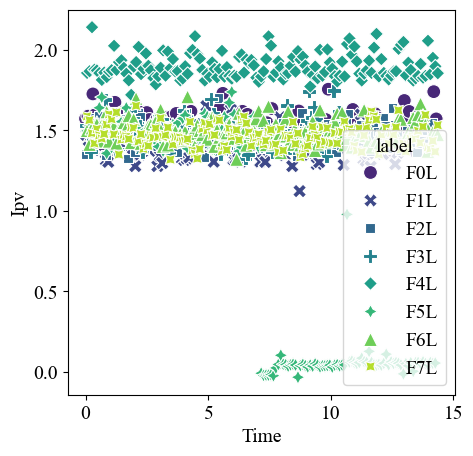

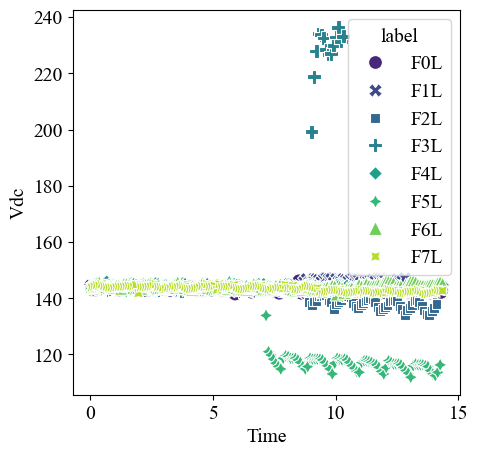

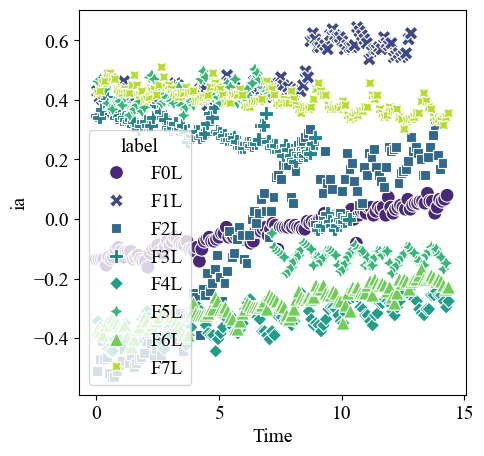

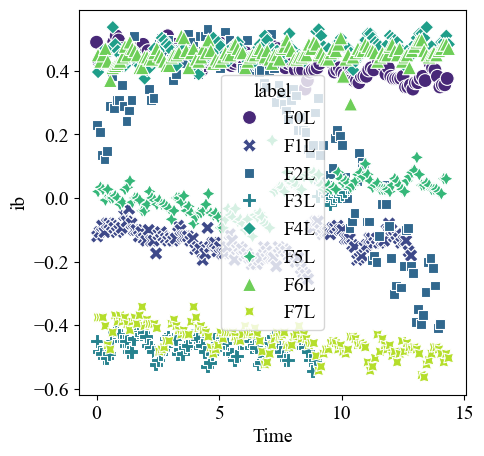

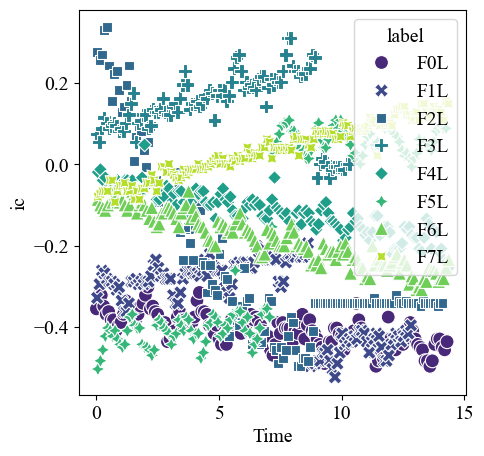

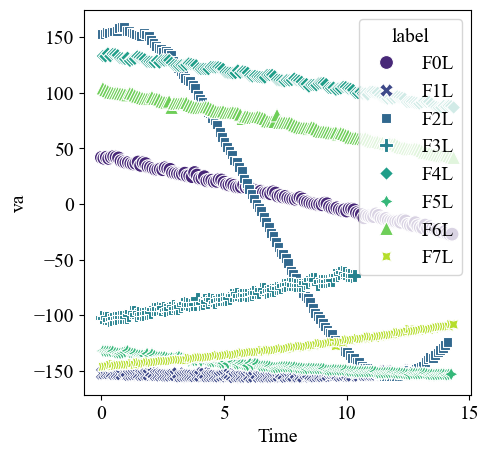

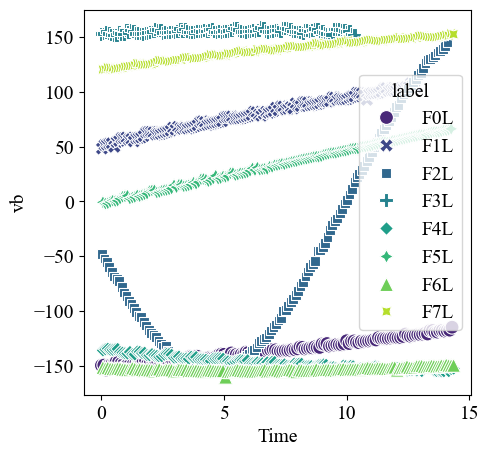

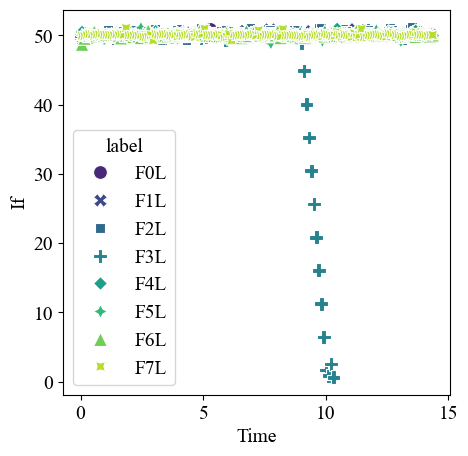

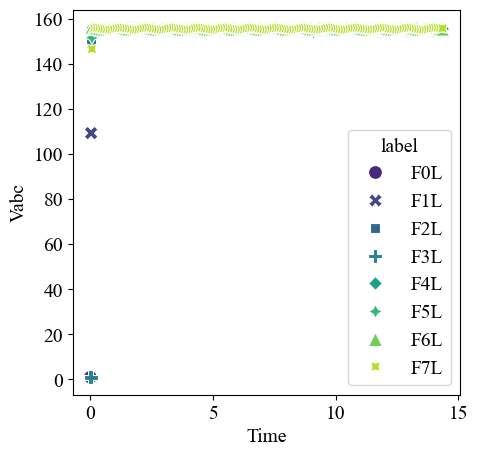

In [6]:
solar_data_Lim_power1= solar_data_Lim_power.iloc[::1000,:]
for col in solar_data_Lim_power1.columns[1:-1]:
    fig = plt.figure(figsize=(5,5))
    sns.scatterplot(data=solar_data_Lim_power1, x="Time", y=col,hue="label",style="label",palette='viridis',edgecolor="white",s=100)
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()

In [7]:
solar_data_Lim_power.iloc[::100,:].to_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Lim_solar_data.csv',index=False)
solar_data_Max_power.iloc[::100,:].to_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Max_solar_data.csv',index=False)

## Import The Limited Power Dataset

In [8]:
df1=pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Lim_solar_data.csv')
df2=pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Max_solar_data.csv')

df1.head()

Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0  0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112 -0.354985   
1  0.010027  1.539215  101.251221  143.261719  0.086425 -0.490112  0.349971   
2  0.020026  1.637604  101.031494  143.554688 -0.155274  0.469971 -0.307988   
3  0.030025  1.577057  101.287842  142.968750  0.106566 -0.456543  0.336543   
4  0.040024  1.613007  101.049805  143.847656 -0.155274  0.456543 -0.314702   

          va          vb          vc      Iabc         If        Vabc  \
0  41.744537 -149.872894  109.064585  1.000000  50.000000    1.000000   
1 -42.311096  149.029083 -108.377482  1.000000  50.000000    1.000000   
2  41.515503 -149.933167  109.104767  1.000000  50.000000    1.000000   
3 -42.106171  150.222473 -109.249420  0.461228  49.921509  151.655756   
4  41.370850 -150.162201  109.245402  0.311221  49.594346  154.027080   

          Vf label  
0  50.000000   F0L  
1  50.000000   F0L  
2  50.000000   F0L  
3  50.078264   F0L  
4  50.193078   F0L

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10935 non-null  float64
 1   Ipv     10935 non-null  float64
 2   Vpv     10935 non-null  float64
 3   Vdc     10935 non-null  float64
 4   ia      10935 non-null  float64
 5   ib      10935 non-null  float64
 6   ic      10935 non-null  float64
 7   va      10935 non-null  float64
 8   vb      10935 non-null  float64
 9   vc      10935 non-null  float64
 10  Iabc    10935 non-null  float64
 11  If      10935 non-null  float64
 12  Vabc    10935 non-null  float64
 13  Vf      10935 non-null  float64
 14  label   10935 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [10]:
df1.describe()

Time           Ipv           Vpv           Vdc            ia  \
count  10935.000000  10935.000000  10935.000000  10935.000000  10935.000000   
mean       6.897607      1.434404     95.301811    142.854778     -0.021510   
std        4.043871      0.403394     18.334260     11.820541      0.336443   
min        0.000028     -0.557220      0.982666    111.621094     -0.793092   
25%        3.414292      1.408661    101.019287    142.968750     -0.329835   
50%        6.831155      1.477722    101.379395    143.554688     -0.014283   
75%       10.248489      1.555298    101.684570    144.433594      0.307982   
max       14.398888      2.349976    110.388184    237.890625      0.683959   

                 ib            ic            va            vb            vc  \
count  10935.000000  10935.000000  10935.000000  10935.000000  10935.000000   
mean       0.011608     -0.025448      0.834603      0.825749      0.830455   
std        0.386721      0.260993    113.191557    125.443972     87.994019   
min       -0.631104     -0.536260   -160.516968   -160.697784   -155.217031   
25%       -0.416260     -0.240850   -114.215851   -138.409119    -77.843577   
50%        0.020142     -0.032720      0.289307      0.602722      1.004537   
75%        0.422974      0.175410    115.493622    140.138931     78.972677   
max        0.711670      0.564814    159.661102    159.829865    158.773092   

               Iabc            If          Vabc            Vf  
count  10935.000000  10935.000000  10935.000000  10935.000000  
mean       0.435392     49.676232    155.030498     49.999694  
std        0.113509      3.816614      6.245268      0.022879  
min        0.000002     -0.010448      1.000000     49.476803  
25%        0.443532     49.922545    155.030903     49.996480  
50%        0.467639     50.016331    155.301785     50.000123  
75%        0.489360     50.128281    155.572033     50.003659  
max        1.000000     51.855298    156.249366     50.445778

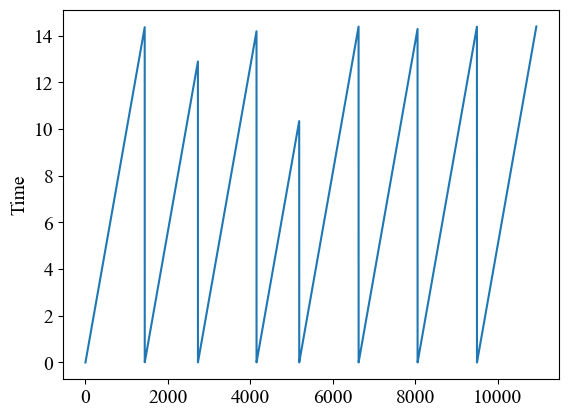

In [11]:
plt.plot(df1['Time'])
plt.ylabel('Time')
plt.show()

## Pie Chart for samples from each fault class

In [12]:
df1['label'].value_counts()

label
F7L    1441
F4L    1440
F6L    1440
F0L    1438
F5L    1430
F2L    1421
F1L    1290
F3L    1035
Name: count, dtype: int64

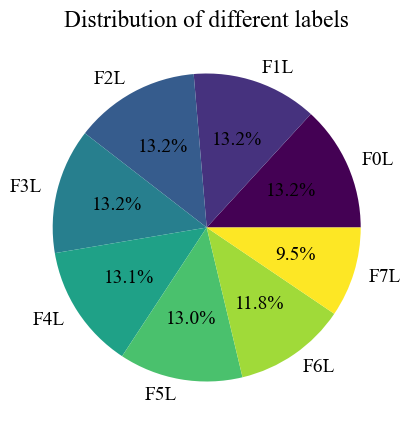

In [13]:
fig = plt.figure(1, figsize=(5,5))
plt.pie(df1['label'].value_counts(),labels =df1['label'].unique(),autopct='%2.1f%%',colors=plt.cm.viridis(np.linspace(0, 1, len(df1['label'].unique()))))
plt.title("Distribution of different labels")
plt.show()

In [48]:
X = df1.iloc[:,1:-1] #Features
Y = df1.iloc[:,-1]   #Traget Labels


plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,cmap='viridis')
plt.show()

## Data Visualization

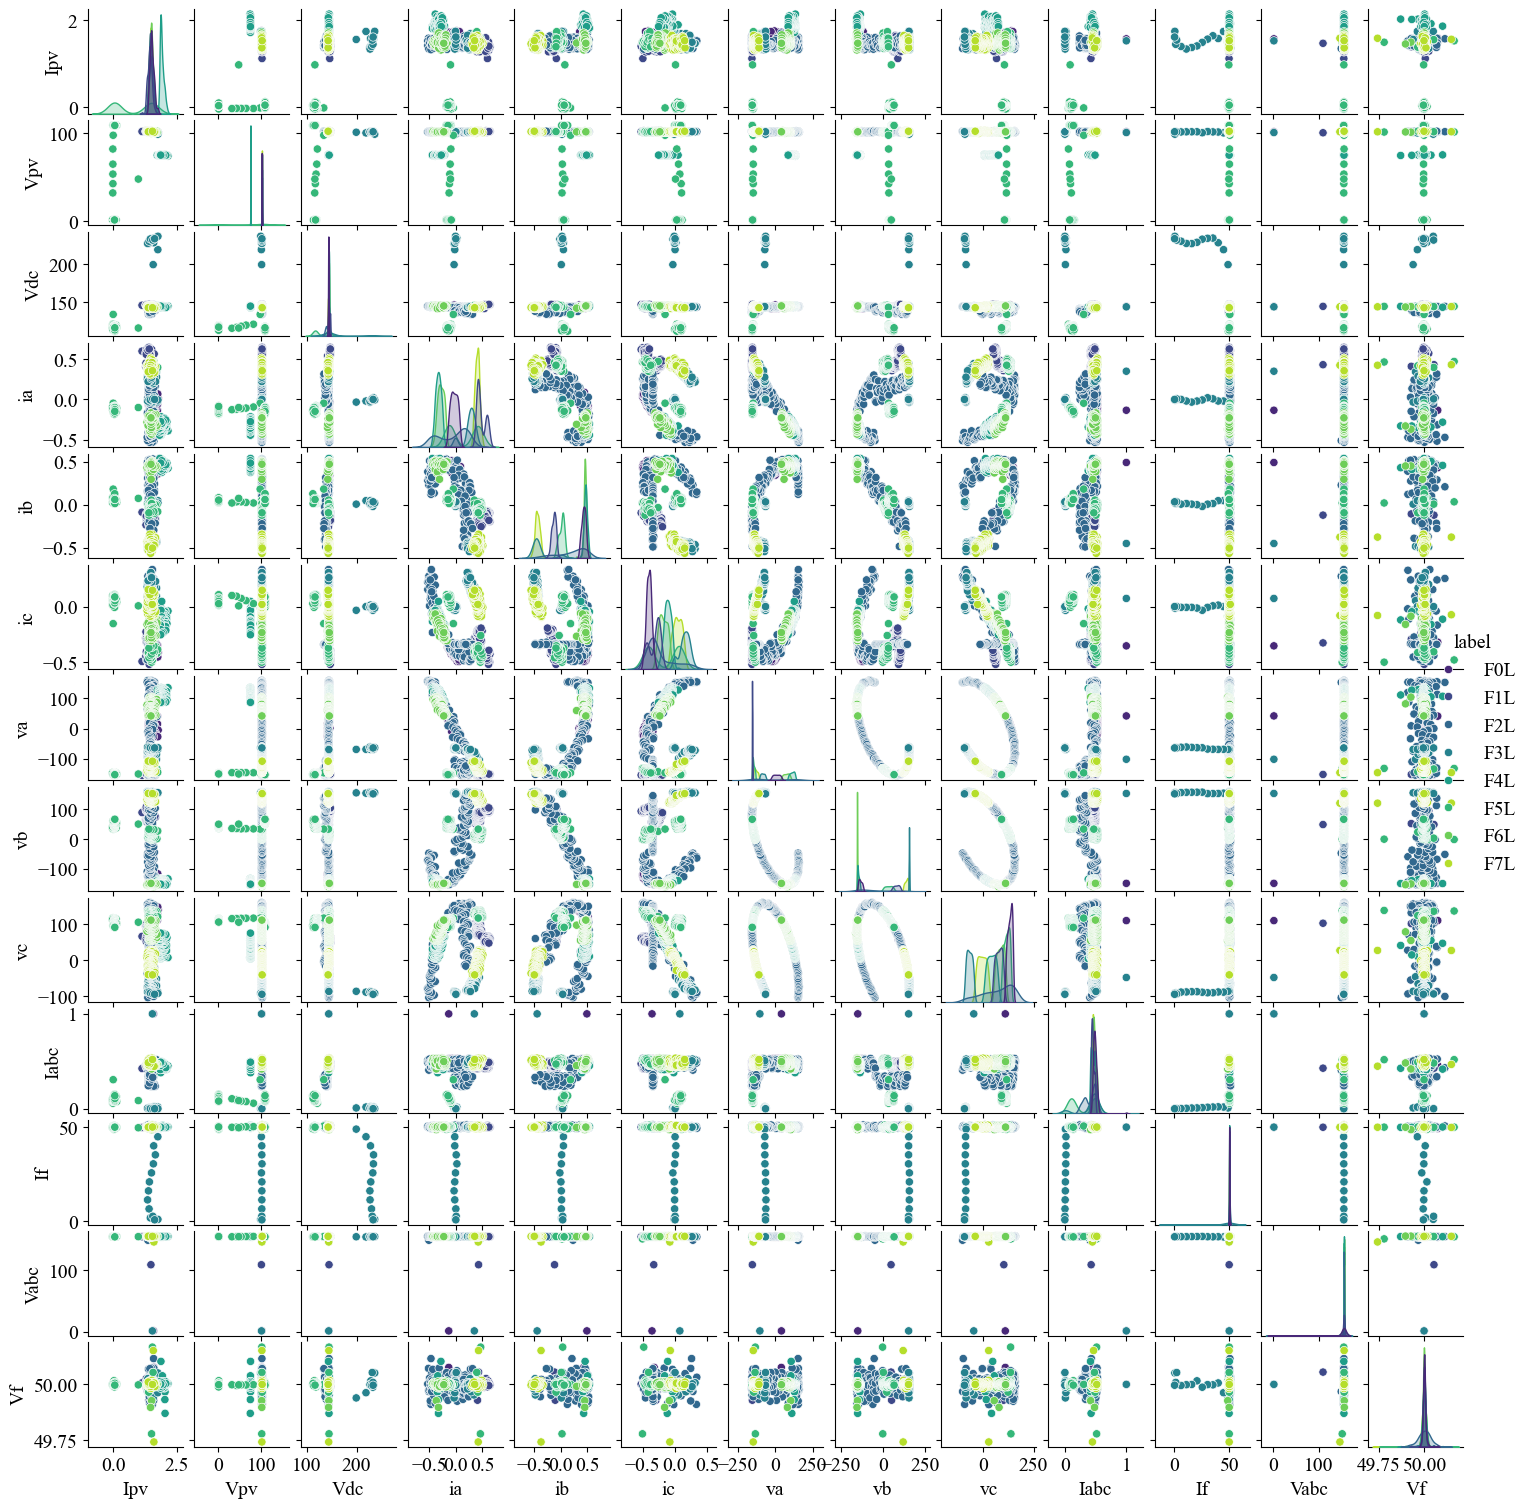

In [15]:
g=sns.pairplot(data=df1.iloc[::10,1:], hue="label",palette='viridis')
g.fig.set_size_inches(15,15)

## Divide the dataset into Train-test split and do the standard scalling

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

scaler=StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

In [17]:
print("The number of samples in the Training set is {}".format(len(X_train)))
print("The number of samples in the Test set is {}".format(len(X_test)))

The number of samples in the Training set is 8748
The number of samples in the Test set is 2187


## Dimensionality Reduction Using PCA

In [18]:
pca = PCA(n_components=2)
pca.fit(X_sc_train)

PCA(n_components=2)

In [19]:
transformed = pca.transform(X_sc_train)

In [20]:
X_sc_train.shape

(8748, 13)

In [21]:
transformed

array([[-1.88480762, -0.71094237],
       [ 2.30202284, -0.52113464],
       [-1.90030091, -0.63863273],
       ...,
       [-1.02861664,  0.24289999],
       [ 2.05086121, -0.15209862],
       [ 2.09889048, -0.47981136]])

In [22]:
pca.explained_variance_ratio_

array([0.2748987, 0.1702507])

In [23]:
for i in range (1,14):
    pca = PCA(n_components=i)
    # prepare transform on dataset
    pca.fit(X_sc_train)
    # apply transform to dataset
    transformed = pca.transform(X_sc_train)
    print("Cummulative explained variance for {}-component: {} ".format(i,np.sum(pca.explained_variance_ratio_)))
    print("")

Cummulative explained variance for 1-component: 0.2748987018247871 

Cummulative explained variance for 2-component: 0.4451494028455815 

Cummulative explained variance for 3-component: 0.6066151451895915 

Cummulative explained variance for 4-component: 0.7422823834696191 

Cummulative explained variance for 5-component: 0.8220485218416997 

Cummulative explained variance for 6-component: 0.8964391080151923 

Cummulative explained variance for 7-component: 0.9548862398316027 

Cummulative explained variance for 8-component: 0.973025172997148 

Cummulative explained variance for 9-component: 0.9861755544237186 

Cummulative explained variance for 10-component: 0.993179519856309 

Cummulative explained variance for 11-component: 0.998235993441997 

Cummulative explained variance for 12-component: 0.9999865290966475 

Cummulative explained variance for 13-component: 1.0 



## PCA with 2 components Visualization

In [50]:
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(X_sc_train)
# apply transform to dataset
transformed = pca.transform(X_sc_train)
#Make a data Frame
principalDf = pd.DataFrame(data = transformed
             , columns = ['principal component 1', 'principal component 2'])
# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=principalDf['principal component 1'],y=principalDf['principal component 2'],hue=y_train,palette='viridis')
plt.show()

## PCA with 3 components Visualization

In [25]:
pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X_sc_train)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(y_train)

In [26]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt


fig = plt.figure(figsize=(8,8))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = y_train.unique()
colors = ['g', 'r','b','y','c','m','k']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(y_train.unique())

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

## Combining Datasets

In [27]:
df = pd.concat([df1,df2], ignore_index=True, axis=0)

In [28]:
df

Time       Ipv         Vpv         Vdc        ia        ib  \
0       0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112   
1       0.010027  1.539215  101.251221  143.261719  0.086425 -0.490112   
2       0.020026  1.637604  101.031494  143.554688 -0.155274  0.469971   
3       0.030025  1.577057  101.287842  142.968750  0.106566 -0.456543   
4       0.040024  1.613007  101.049805  143.847656 -0.155274  0.456543   
...          ...       ...         ...         ...       ...       ...   
21631  14.353236  2.363220   87.280273  145.019531  0.542968 -0.718384   
21632  14.363235  2.308350   86.737061  145.312500 -0.631959  0.590820   
21633  14.373234  2.341461   87.103271  145.312500  0.536254 -0.711670   
21634  14.383233  2.426605   87.011719  145.312500 -0.625245  0.584106   
21635  14.393232  2.352814   87.225342  145.312500  0.549682 -0.691528   

             ic          va          vb          vc      Iabc         If  \
0     -0.354985   41.744537 -149.872894  109.064585  1.000000  50.000000   
1      0.349971  -42.311096  149.029083 -108.377482  1.000000  50.000000   
2     -0.307988   41.515503 -149.933167  109.104767  1.000000  50.000000   
3      0.336543  -42.106171  150.222473 -109.249420  0.461228  49.921509   
4     -0.314702   41.370850 -150.162201  109.245402  0.311221  49.594346   
...         ...         ...         ...         ...       ...        ...   
21631  0.161982 -125.233612  143.013916  -18.270518  0.700222  49.837684   
21632 -0.005864  126.101532 -142.121887   18.503571  0.696735  49.979017   
21633  0.168696 -124.751434  142.893372  -18.073629  0.692128  50.219535   
21634  0.000850  125.438538 -143.050079   18.379008  0.690443  50.113452   
21635  0.168696 -124.835815  143.013916  -17.792358  0.688933  49.903225   

             Vabc         Vf label  
0        1.000000  50.000000   F0L  
1        1.000000  50.000000   F0L  
2        1.000000  50.000000   F0L  
3      151.655756  50.078264   F0L  
4      154.027080  50.193078   F0L  
...           ...        ...   ...  
21631  155.419819  49.997678   F7M  
21632  155.409061  50.000249   F7M  
21633  155.370171  50.000483   F7M  
21634  155.363070  49.999983   F7M  
21635  155.388027  50.003751   F7M  

[21636 rows x 15 columns]

In [29]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

## Divide the dataset into Train-test split and do the standard scalling

In [30]:
def split_transform(df,split_ratio):
    X=df.iloc[:,0:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

In [31]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.02)

The number of samples in the Training set is 21203
The number of samples in the Test set is 433


## Model training

In [32]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")
    #Generate k-fold with shuffled split
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)
    
    # get score for each split
    scores = cross_val_score(clf, X_sc_train,y_train, cv=cv, n_jobs=-1)
    
    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")

In [33]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.98910675 0.99330843 0.99112979 0.9929972  0.99268596]
0.9918456271397448 accuracy with a standard deviation of 0.0015611498542153093



## Decision Trees

In [34]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.97261127 0.97525677 0.97603486 0.97385621 0.96794273]
0.9731403672580143 accuracy with a standard deviation of 0.0028518421883486724



## SVM

In [35]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96125117 0.96125117 0.96125117 0.96171802 0.9589169 ]
0.9608776844070961 accuracy with a standard deviation of 0.0009969260739525



## KNN

In [36]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96716464 0.96840959 0.96700903 0.96545285 0.96545285]
0.966697790227202 accuracy with a standard deviation of 0.0011264837267882745



## Logistic Reg

In [37]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.7351385  0.74680984 0.74323063 0.75412387 0.75241208]
0.7463429816370992 accuracy with a standard deviation of 0.006823800722503431



## prediction with best performing Model

In [38]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_,
    cmap=plt.cm.Reds
)


disp.plot(ax=ax)

The number of samples in the Training set is 17308
The number of samples in the Test set is 4328


## reducing the features to 7-faults ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

In [39]:
df1=pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Max_solar_data.csv')
df2=pd.read_csv(r'D:\py_projects\Solar panel fault diagnosis\preprocessed_data\Lim_solar_data.csv')

In [40]:
for i in range (len(df1)):    
    cls = df1['label'][i]
    cls = cls[:-1]
    df1['label'][i] = cls
df1.insert(1, "mode", 0)    
    
for i in range (len(df2)):    
    cls = df2['label'][i]
    cls = cls[:-1]
    df2['label'][i] = cls    
    
df2.insert(1, "mode", 1)  

C:\Users\sahun\AppData\Local\Temp\ipykernel_9972\2075015124.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['label'][i] = cls
C:\Users\sahun\AppData\Local\Temp\ipykernel_9972\2075015124.py:4: SettingWithCopyWarning: 
A value is tryin

In [41]:
df = pd.concat([df1,df2], ignore_index=True, axis=0)
df = df.drop(columns=['ia','ib','ic'])# Drop highly correlated features
df

Time  mode       Ipv         Vpv         Vdc          va  \
0       0.000041     0  2.369843   90.429688  147.949219 -146.003418   
1       0.010040     0  2.378357   90.368652  148.242188  148.546906   
2       0.020039     0  2.373627   90.460205  148.535156 -145.027008   
3       0.030038     0  2.368896   90.423584  148.242188  147.341461   
4       0.040037     0  2.362274   90.435791  148.242188 -143.279114   
...          ...   ...       ...         ...         ...         ...   
21631  14.358892     1  1.531647  102.056885  142.675781 -108.381500   
21632  14.368891     1  1.565704  101.104736  143.261719  110.756226   
21633  14.378890     1  1.501373  101.556396  142.968750 -108.803406   
21634  14.388889     1  1.492859  100.970459  143.847656  110.720062   
21635  14.398888     1  1.516510  102.166748  142.968750 -108.586426   

               vb         vc      Iabc         If        Vabc         Vf label  
0      120.255127  25.595601  1.000000  50.000000    1.000000  50.000000    F0  
1     -119.881439 -24.723663  1.000000  50.000000    1.000000  50.000000    F0  
2      120.315399  26.109924  1.000000  50.000000    1.000000  50.000000    F0  
3     -119.736786 -26.105906  0.440380  50.078491  118.275197  49.921509    F0  
4      120.942230  26.680501  0.618996  50.248673   90.022162  49.606494    F0  
...           ...        ...       ...        ...         ...        ...   ...  
21631  152.585144 -40.760091  0.519110  50.036816  155.672324  49.999645    F7  
21632 -149.559479  43.311615  0.519713  50.087054  155.706972  49.992937    F7  
21633  152.319946 -40.470785  0.522856  50.138598  155.636851  49.996147    F7  
21634 -150.451508  42.560221  0.525012  49.932554  155.571019  50.008771    F7  
21635  151.524353 -41.503448  0.525349  49.924121  155.553069  50.005752    F7  

[21636 rows x 13 columns]

In [42]:
df['mode'].unique()

array([0, 1], dtype=int64)

In [43]:
df['label'].unique()

array(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7'], dtype=object)

In [44]:
print("Random Forest")
clf_random_forest = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf_random_forest,k_fold=5,test_size=0.3)
print("")
print("Decision Tree")
clf_decision_tree = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf_decision_tree,k_fold=5,test_size=0.3)
print("")
print("Support Vector Machines")
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("KNN")
clf_knn = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf_knn,k_fold=5,test_size=0.3)
print("")
print("Logistic Regression")
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("Naive Byes")
clf = GaussianNB()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

Random Forest
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.98770619 0.98910675 0.98506069 0.98786181 0.98957361]
0.9878618113912232 accuracy with a standard deviation of 0.0015716627666296098


Decision Tree
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96903206 0.97136632 0.96560847 0.96949891 0.96981015]
0.9690631808278866 accuracy with a standard deviation of 0.001896750573942447


Support Vector Machines
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.90771864 0.91020853 0.90538438 0.91160909 0.90585123]
0.9081543728602552 accuracy with a standard deviation of 0.0024216450250765156


KNN
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.93713041 0.9291939  0.93697479 0.92950514 0.93059446]
0.9326797385620914 accuracy with a standard deviation of 0.0036009300477823107


Logis

In [45]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_
)

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


In [46]:
# with open('random_forest_model.pkl', 'wb') as model_file:
#     pickle.dump(Model, model_file)
# print(f"Model has been saved to random_forest__model.pkl")